Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [13]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

First reload the data we generated in _notmist.ipynb_.

In [14]:

data_set = input_data.read_data_sets('', False)
training_data=data_set.train
testing_data=data_set.test

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


In [15]:

images_feed, labels_feed = training_data.next_batch(10000,False)
image_size = 28
num_labels = 10
np.min(images_feed)

0.0

In [34]:
tf.nn.dropout?

In [4]:
training_data.next_batch(10)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([5, 1, 1, 3, 6, 2, 6, 3, 3, 1], dtype=uint8))

In [41]:
batch_size = 128
nHidden=196
beta=3
rho=.05

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
   
  # Variables.
  weights_hidden1 = tf.Variable(tf.truncated_normal([image_size * image_size, nHidden],stddev=0.01))
  weights = tf.Variable(tf.truncated_normal([nHidden, image_size*image_size],stddev=0.01))
  biases_hidden1 = tf.Variable(tf.zeros([nHidden]))
  biases = tf.Variable(tf.zeros([image_size*image_size]))
  
  # Training computation.
  hidden_comp=tf.matmul(tf_train_dataset, weights_hidden1)
  hidden1 = tf.nn.sigmoid(tf.mul(hidden_comp  + biases_hidden1,8))
  output_units = tf.nn.sigmoid(tf.matmul(hidden1, weights) + biases)
  int_rho=tf.reduce_sum(hidden1,0)
  rho_hat=tf.div(int_rho,batch_size)
  rho_hat_mean=tf.reduce_mean(rho_hat)
  rho_in=tf.sub(tf.constant(1.),rho)
  rho_hat_in=tf.sub(tf.constant(1.),rho_hat)
  klterm=tf.add(tf.mul(rho,tf.log(tf.div(rho,rho_hat))),tf.mul(rho_in,tf.log(tf.div(rho_in,rho_hat_in))))
  kl_div=tf.reduce_sum(klterm)
  loss =  tf.div(tf.nn.l2_loss(tf.sub(output_units, tf_train_dataset)),tf.constant(float(batch_size))) + beta*kl_div
            
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.0075).minimize(loss)
  
  # Predictions for the training, validation, and test data.
    #l2_loss variation check
    #adaptive beta
    #sigmoid output

In [42]:
num_steps = 10001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    # Generate a minibatch.
    batch_data,_ = training_data.next_batch(batch_size)
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data}
    _, l, feature_weights, rhohat, kldiv= session.run(
      [optimizer, loss, weights_hidden1,rho_hat_mean, kl_div], feed_dict=feed_dict)
    if step%500==0:
        print("step", step," \t loss ",l, "\t Mean Rho-hat",rhohat,"\t KL-Div",kldiv)
        
# for i in xrange(batch_size):
    #        plt.imshow(features[i].reshape(image_size,image_size), cmap=cm.gray)

Initialized
step 0  	 loss  394.208 	 Mean Rho-hat 0.501772 	 KL-Div 101.113
step 500  	 loss  64.8114 	 Mean Rho-hat 0.0492989 	 KL-Div 1.28041
step 1000  	 loss  46.8992 	 Mean Rho-hat 0.0739189 	 KL-Div 1.59237
step 1500  	 loss  37.5511 	 Mean Rho-hat 0.0719115 	 KL-Div 1.14162
step 2000  	 loss  33.8361 	 Mean Rho-hat 0.0732928 	 KL-Div 1.35625
step 2500  	 loss  32.1346 	 Mean Rho-hat 0.0654946 	 KL-Div 1.12388
step 3000  	 loss  29.233 	 Mean Rho-hat 0.0632531 	 KL-Div 0.923285
step 3500  	 loss  27.3251 	 Mean Rho-hat 0.0635886 	 KL-Div 0.807795
step 4000  	 loss  26.458 	 Mean Rho-hat 0.0613784 	 KL-Div 0.892536
step 4500  	 loss  25.4095 	 Mean Rho-hat 0.0618879 	 KL-Div 0.823635
step 5000  	 loss  24.8417 	 Mean Rho-hat 0.0616414 	 KL-Div 0.676793
step 5500  	 loss  24.0553 	 Mean Rho-hat 0.0607239 	 KL-Div 0.868995
step 6000  	 loss  22.0646 	 Mean Rho-hat 0.0631814 	 KL-Div 0.764057
step 6500  	 loss  21.1218 	 Mean Rho-hat 0.0638857 	 KL-Div 0.662423
step 7000  	 loss  21

(784, 196)
(196, 784)


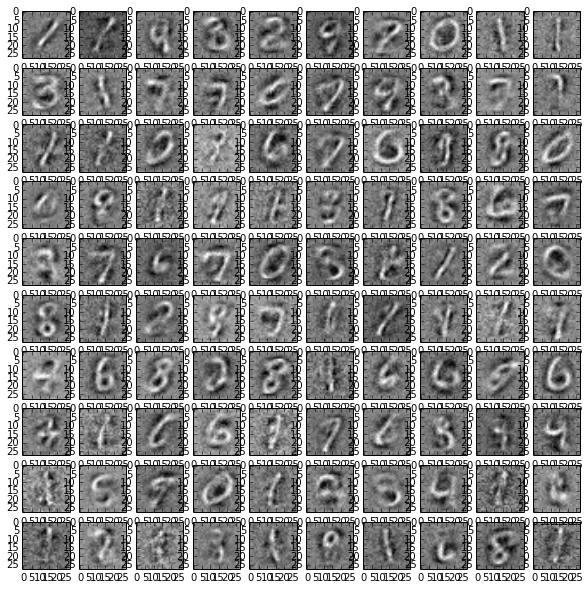

In [43]:
print(feature_weights.shape)
features=feature_weights.transpose()  
print(features.shape)

fig = plt.figure(figsize = (10,10))
for i in range(100):
   ax = fig.add_subplot(10,10,i)
   ax.imshow(features[i].reshape(image_size,image_size), cmap=cm.gray)

(784, 196)
(196, 784)


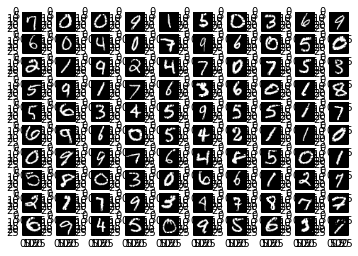

In [146]:
print(feature_weights.shape)
features=feature_weights.transpose()  
print(features.shape)
fig = plt.figure()
for i in range(100):
   ax = fig.add_subplot(10,10,i)
   ax.imshow(batch_data[i].reshape(image_size,image_size), cmap=cm.gray)

In [29]:
fig = plt.figure()
fig.add_subplot(1,)